In [1]:
%load_ext autoreload
%autoreload 2

import fastai
from fastai import *
from fastai.vision import *

In [2]:
fastai.__version__

'1.0.58.dev0'

In [3]:
lesson_dir_path = Path('lesson3-planet')

In [4]:
df = pd.read_csv(lesson_dir_path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [5]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)

In [6]:
tfms = get_transforms()

In [7]:
src = (ImageList.from_csv(path=lesson_dir_path, csv_name='train_v2.csv', folder='train-jpg', suffix='.jpg')
                .split_by_rand_pct(0.2, seed=1)
                .label_from_df(label_delim=' '))
src

LabelLists;

Train: LabelList (32384 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: /home/blaberj/fastai_course/lesson3-planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
clear;primary,clear;primary,agriculture;clear;cultivation;primary,clear;primary,agriculture;clear;primary
Path: /home/blaberj/fastai_course/lesson3-planet;

Test: None

In [8]:
src.classes

['agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water']

In [9]:
native_size = 256

# Resnet34

### Do half size first

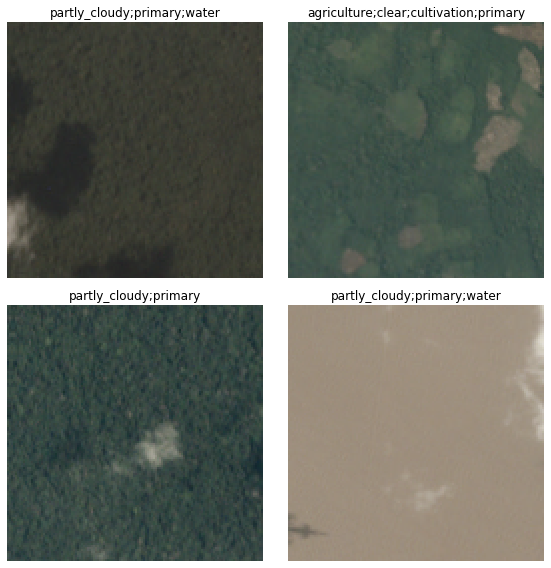

In [10]:
data = (src.transform(tfms, size=native_size//2)
           .databunch()
           .normalize(imagenet_stats))
data.show_batch(2)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


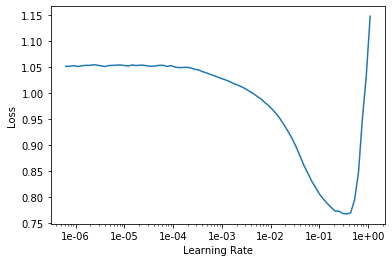

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
lr = 3e-2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.142954,0.120758,0.943342,0.892228,00:33
1,0.126049,0.105682,0.946728,0.904422,00:32
2,0.129660,0.102886,0.948654,0.911406,00:33
3,0.122648,0.104101,0.944323,0.910487,00:34
4,0.118225,0.109622,0.949119,0.911830,00:33
5,0.111202,0.100329,0.948174,0.912897,00:34
6,0.106414,0.118318,0.950659,0.917991,00:33
7,0.100825,0.092635,0.956219,0.920496,00:33
8,0.095787,0.088555,0.956110,0.923577,00:34
9,0.093515,0.090485,0.954249,0.922871,00:33


In [14]:
learn.save('resnet34-base-size_half-stage_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


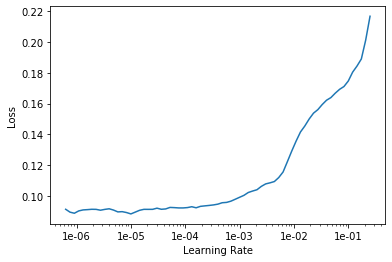

In [15]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.101147,0.109455,0.948806,0.913198,00:40
1,0.102556,0.093732,0.948872,0.919578,00:40
2,0.096077,0.089813,0.956197,0.922380,00:41
3,0.090384,0.087478,0.957367,0.924287,00:40
4,0.086846,0.085314,0.956494,0.925469,00:40


In [17]:
learn.save('resnet34-base-size_half-stage_2')

### Do full size next

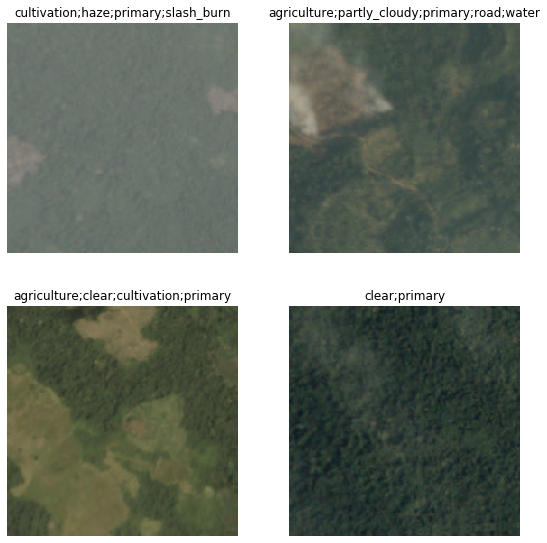

In [18]:
data = (src.transform(tfms, size=native_size)
           .databunch()
           .normalize(imagenet_stats))
data.show_batch(2)

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=[acc_02, f_score])
learn.load('resnet34-base-size_half-stage_2')

Learner(data=ImageDataBunch;

Train: LabelList (32384 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
haze;primary,agriculture;clear;primary;water,clear;primary,agriculture;clear;habitation;primary;road,haze;primary;water
Path: /home/blaberj/fastai_course/lesson3-planet;

Valid: LabelList (8095 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: MultiCategoryList
clear;primary,clear;primary,agriculture;clear;cultivation;primary,clear;primary,agriculture;clear;primary
Path: /home/blaberj/fastai_course/lesson3-planet;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilati

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


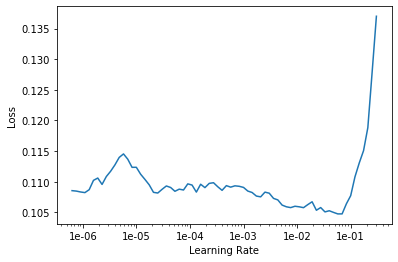

In [20]:
learn.lr_find()
learn.recorder.plot()

In [21]:
lr = 1e-2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.096863,0.088953,0.959460,0.922134,01:25
1,0.097355,0.088768,0.956029,0.921850,01:23
2,0.094088,0.094080,0.957308,0.923875,01:22
3,0.087906,0.087849,0.958290,0.926184,01:22
4,0.085933,0.085988,0.957541,0.926323,01:22


In [22]:
learn.save('resnet34-base-size_full-stage_1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


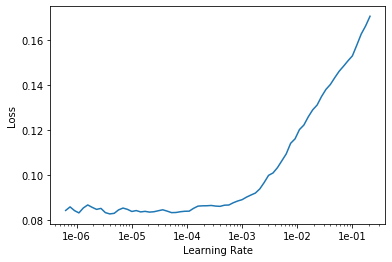

In [23]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, slice(1e-5, lr/10))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.091554,0.092767,0.954925,0.925027,01:44
1,0.090724,0.086442,0.955346,0.924060,01:45
2,0.087400,0.083694,0.956734,0.926536,01:45
3,0.082675,0.085396,0.959982,0.927859,01:43
4,0.077673,0.083746,0.958152,0.927960,01:42


In [25]:
learn.save('resnet34-base-size_full-stage_2')

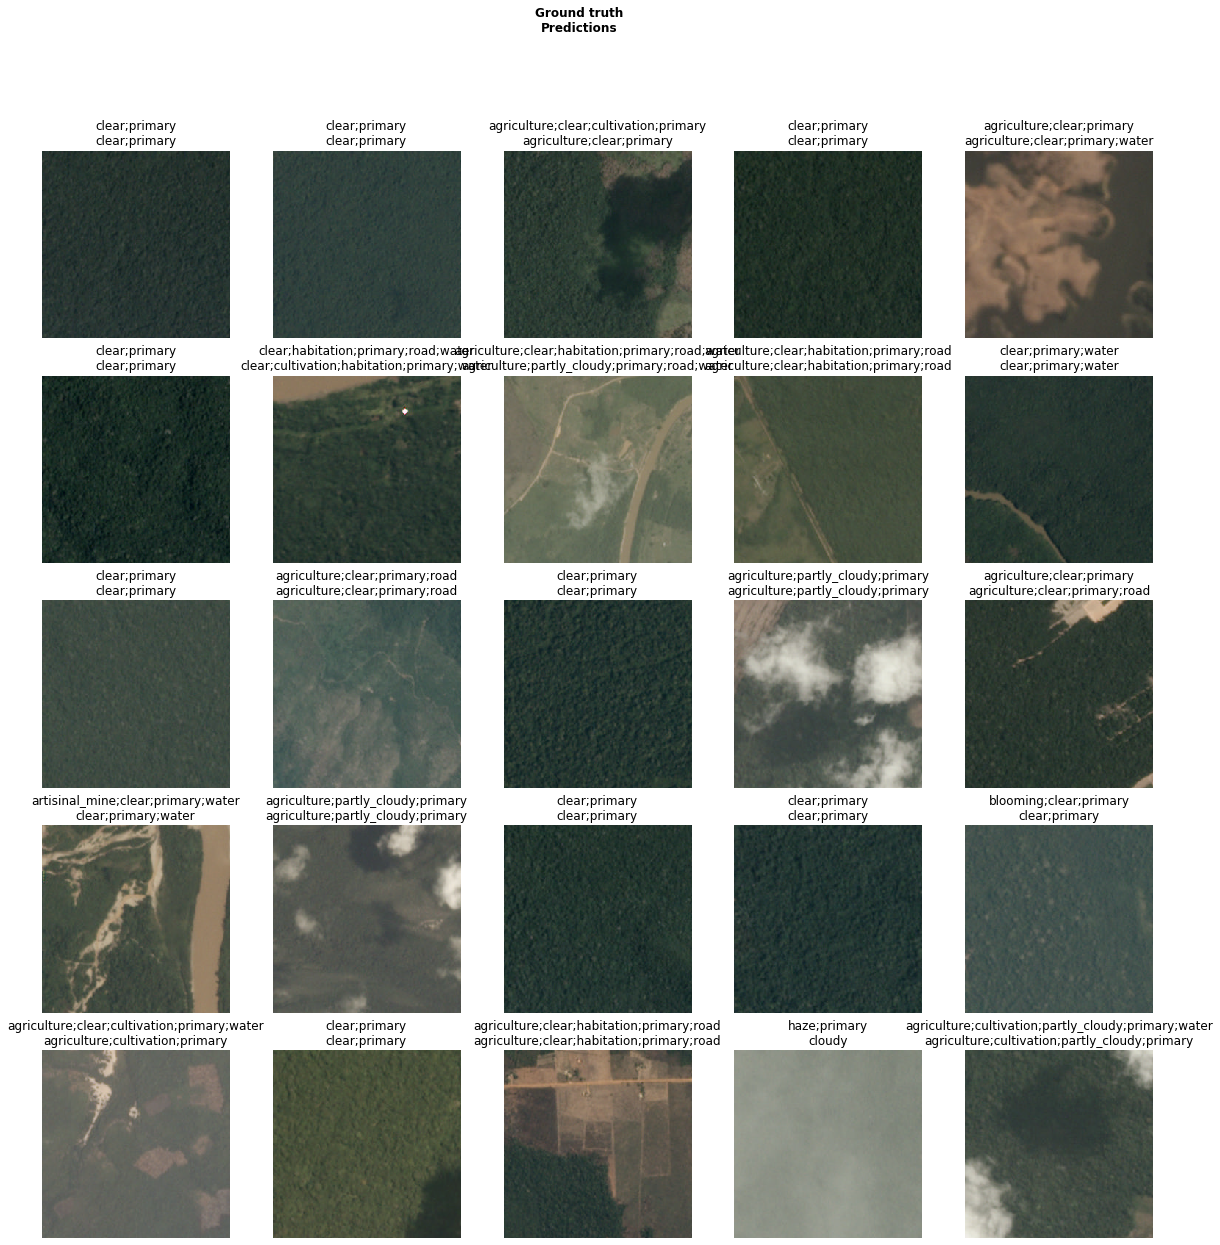

In [26]:
learn.show_results()